In [ ]:
!pip install -q sklearn

In [ ]:
pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.6 MB/s 


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense

import seaborn as sns

In [ ]:
from google.colab import files
training = files.upload()
evaluation = files.upload()

Saving datos_entrenamiento_12_horas_corr.csv to datos_entrenamiento_12_horas_corr.csv


Saving datos_test_12_horas_corr.csv to datos_test_12_horas_corr.csv


In [ ]:
data_total = files.upload()

Saving datos_entrenamiento_12_horas.csv to datos_entrenamiento_12_horas.csv


In [ ]:
# load dataset.
import io
set_of_data = pd.read_csv(io.BytesIO(data_total['datos_entrenamiento_12_horas.csv']))
dftrain_p = pd.read_csv(io.BytesIO(training['datos_entrenamiento_12_horas_corr.csv']))
dfeval_p = pd.read_csv(io.BytesIO(evaluation['datos_test_12_horas_corr.csv']))
y_train_p = dftrain_p.pop('POWER_12')
y_eval_p = dfeval_p.pop('POWER_12')

#Variables that were not as important
#extra_variables_p= (dftrain_p.pop('DENSITY'),dfeval_p.pop('DENSITY'),dftrain_p.pop('AREA'),dfeval_p.pop('AREA'))
dftrain_p.head()

#sns.pairplot(dftrain_p[["T2MWET","RH2M"]], diag_kind="kde")
#creating feature columns
#feature_columns = []
#for feature_name in list(dftrain.columns):
#  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

#print((feature_columns))

,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,T2M,T2MWET,PS,T2MDEW,POWER,...,QV2M_11,RH2M_11,PRECTOTCORR_11,WS10M_11,WD10M_11,T2M_11,T2MWET_11,PS_11,T2MDEW_11,POWER_11
0,19.47,88.19,0.18,5.63,0.56,26.83,25.79,100.69,24.74,3.825563,...,18.13,88.38,0.01,6.14,42.83,25.62,24.61,100.86,23.58,4.990720
1,19.29,88.56,0.09,5.64,9.72,26.62,25.60,100.77,24.58,3.851736,...,18.25,86.88,0.01,6.26,43.18,26.05,24.88,100.93,23.72,5.285156
2,19.17,88.94,0.07,5.52,21.26,26.42,25.44,100.82,24.47,3.615279,...,18.37,84.88,0.01,6.52,42.62,26.56,25.20,101.00,23.84,5.965393
3,19.10,89.25,0.06,5.71,33.10,26.31,25.37,100.85,24.43,4.004253,...,18.43,82.31,0.01,7.01,41.52,27.15,25.53,101.03,23.90,7.401594
4,19.04,89.56,0.09,6.07,40.51,26.23,25.33,100.84,24.41,4.811187,...,18.43,79.38,0.01,7.00,42.11,27.74,25.80,101.00,23.87,7.353327


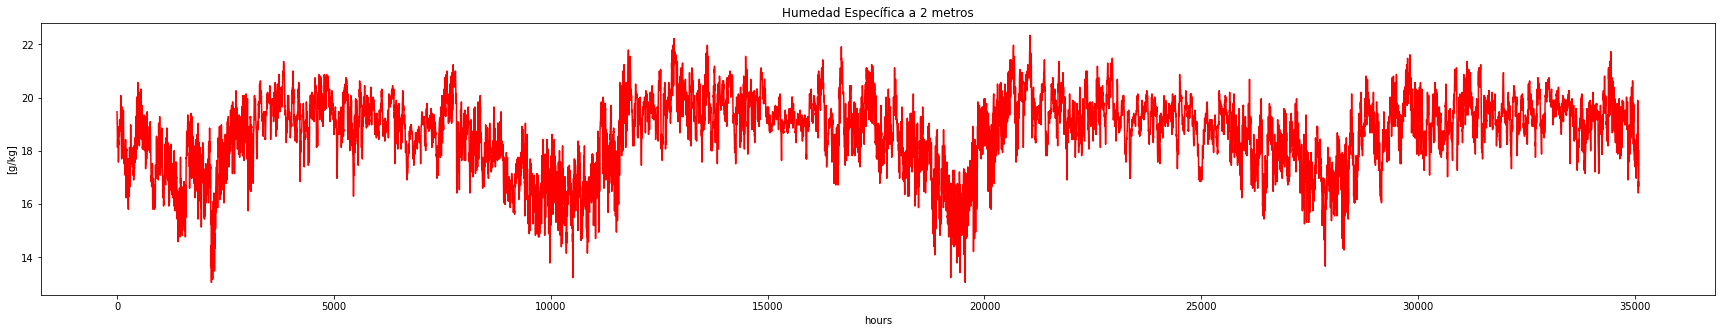

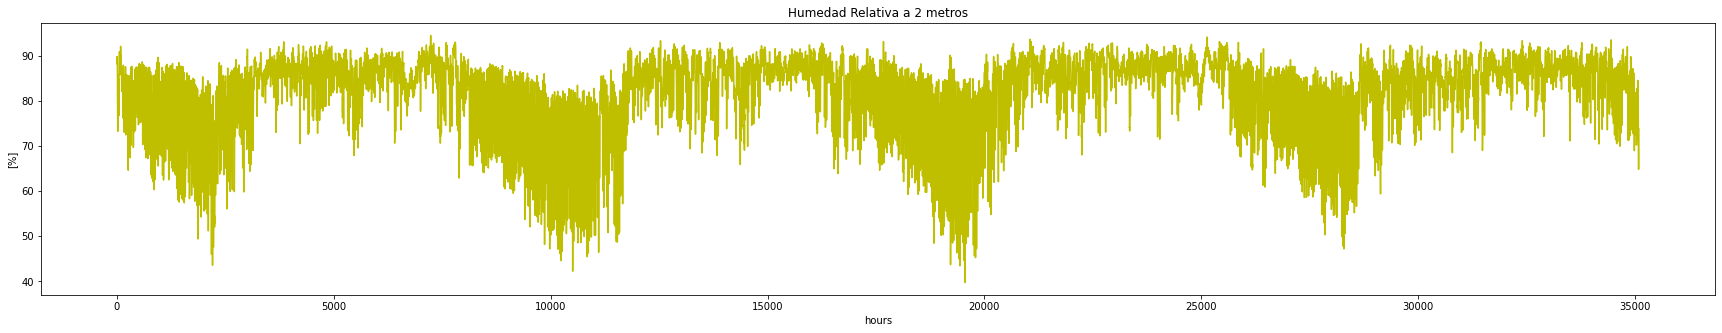

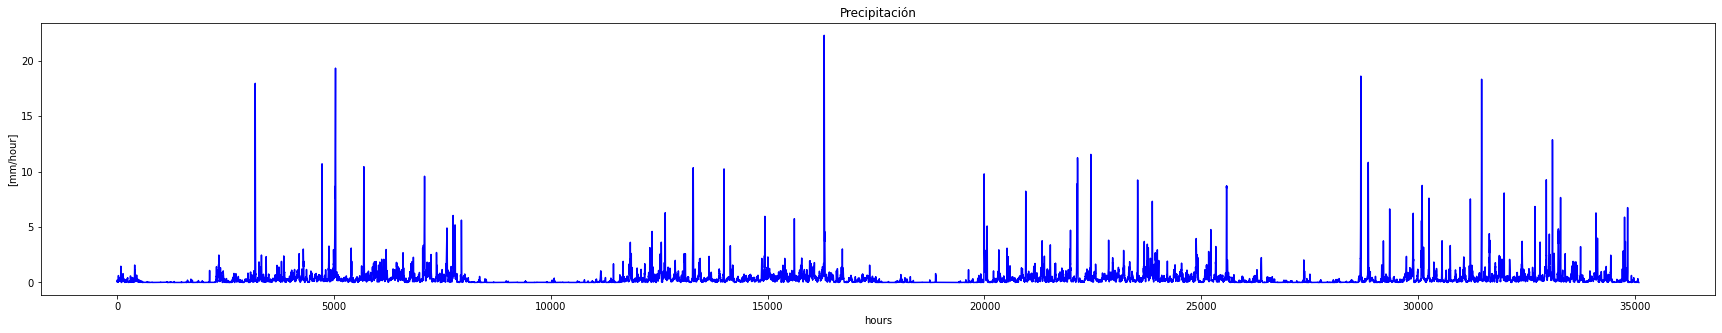

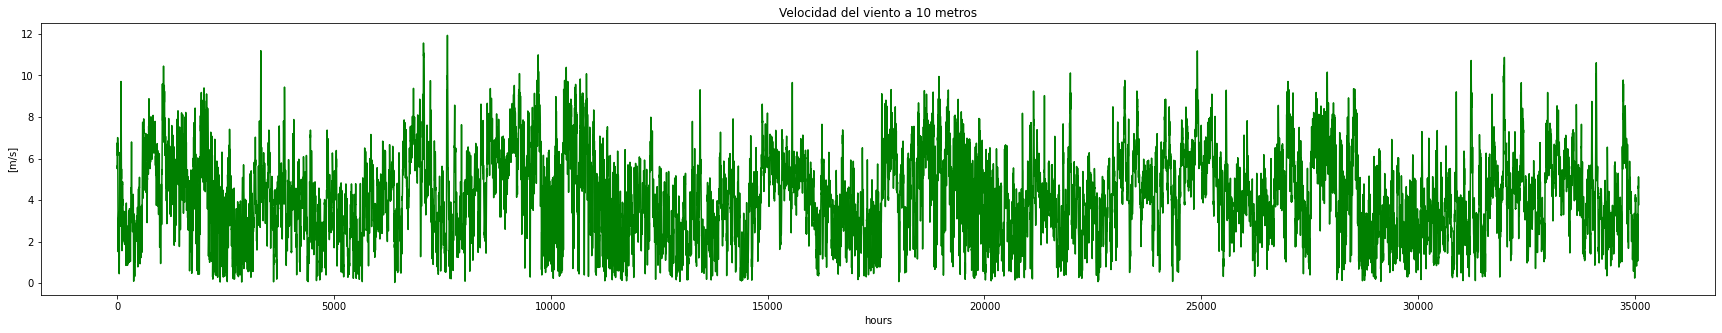

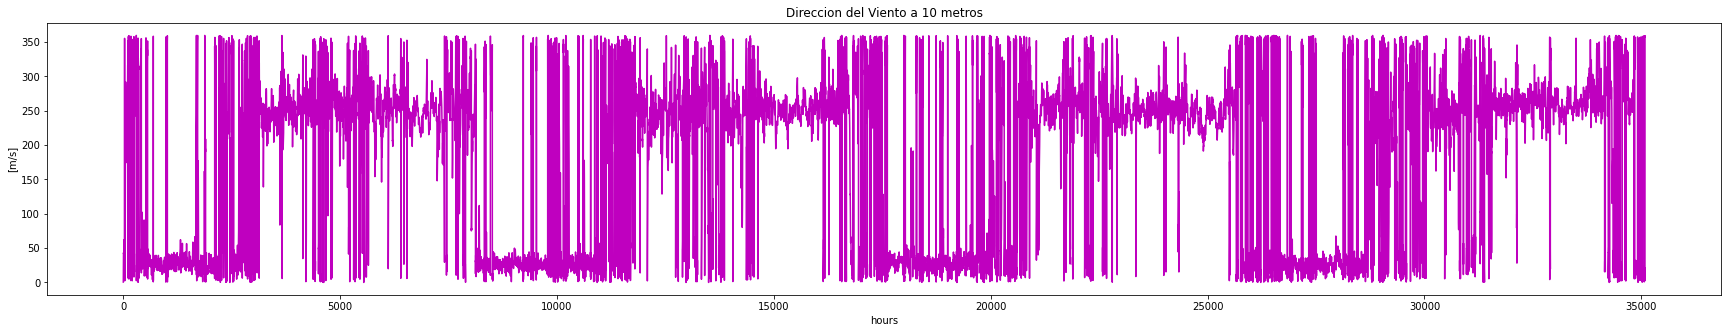

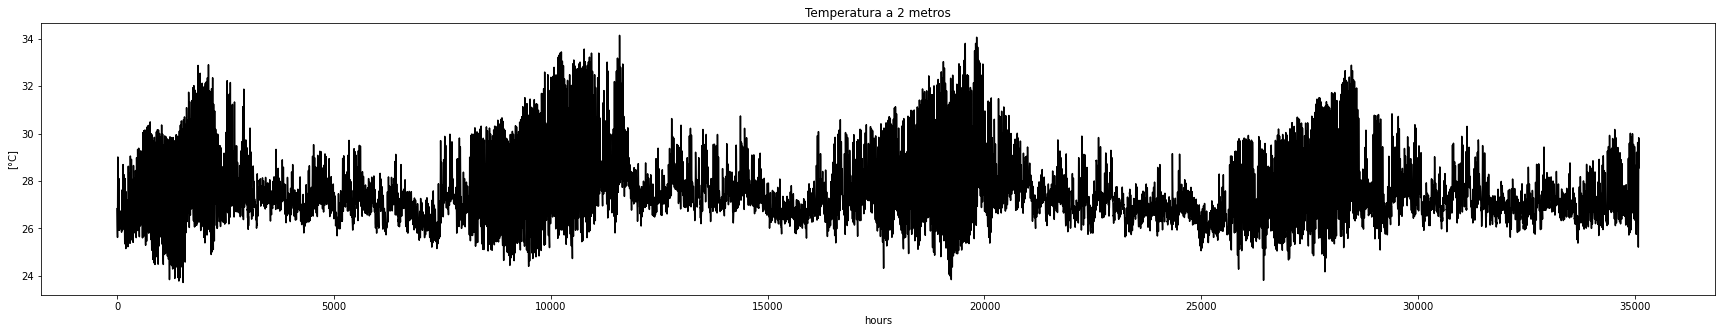

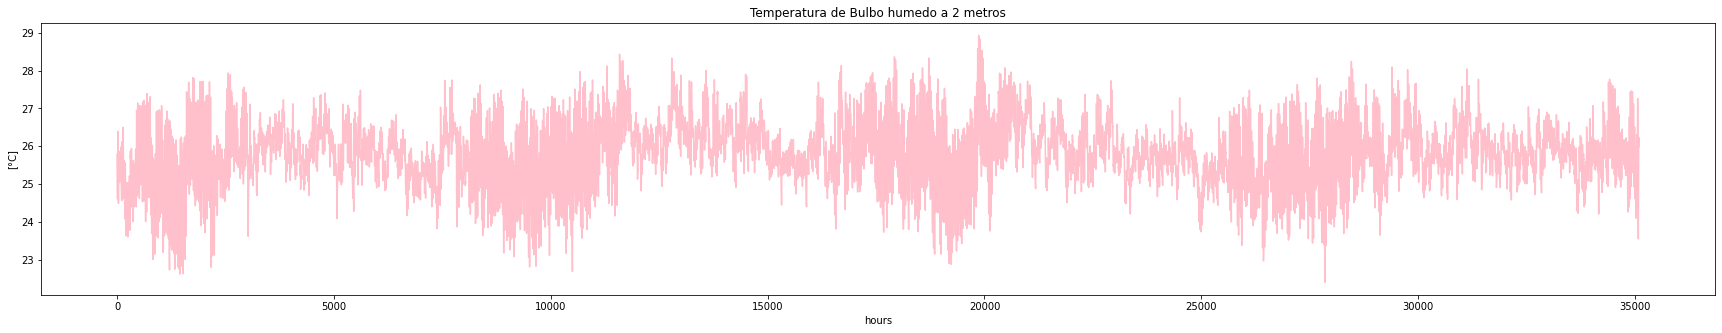

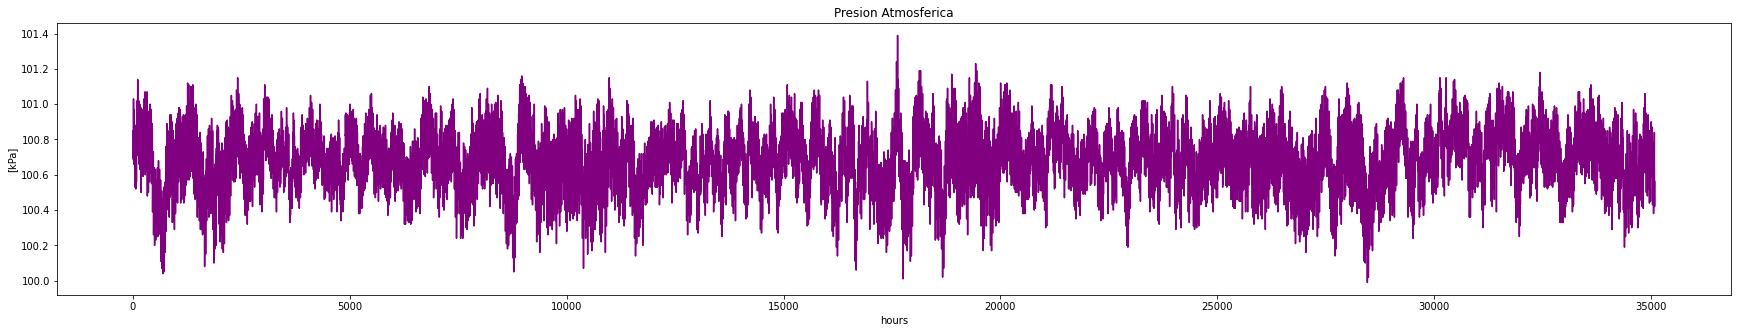

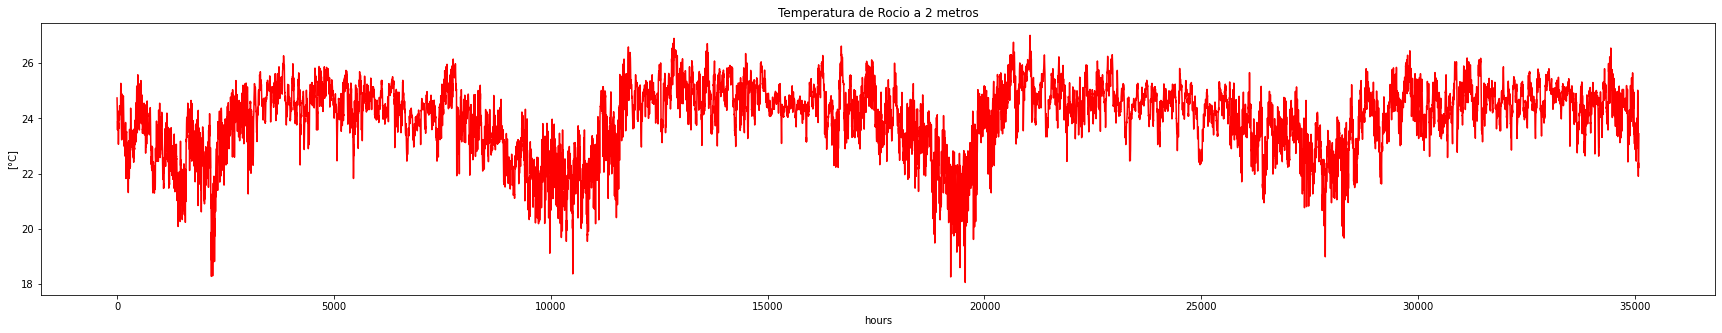

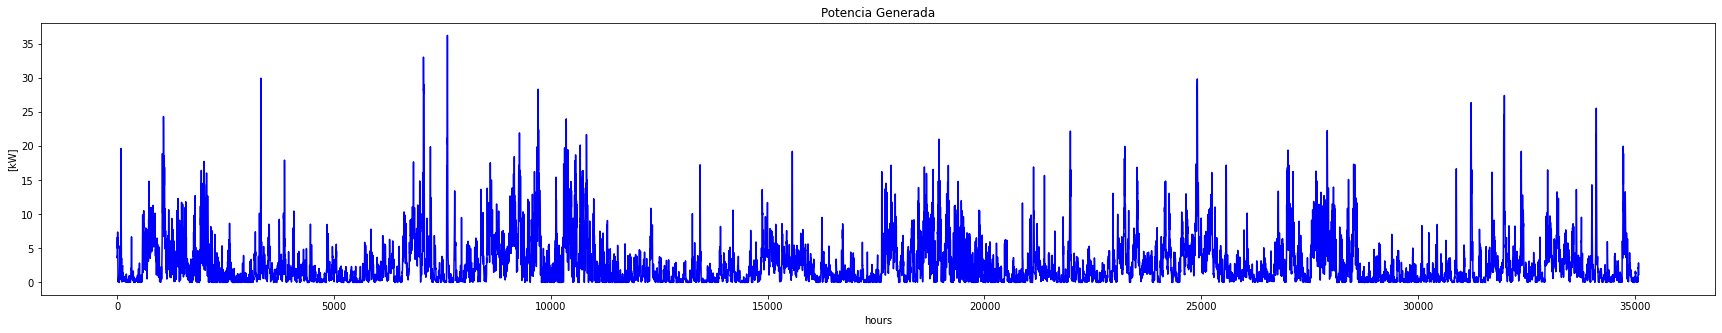

In [ ]:
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(set_of_data['QV2M'], color='r')
plt.title('Humedad Específica a 2 metros')
plt.ylabel('[g/kg]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['RH2M'], color='y')
plt.title('Humedad Relativa a 2 metros')
plt.ylabel('[%]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['PRECTOTCORR'], color='b')
plt.title('Precipitación')
plt.ylabel('[mm/hour]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['WS10M'], color='g')
plt.title('Velocidad del viento a 10 metros')
plt.ylabel('[m/s]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['WD10M'], color='m')
plt.title('Direccion del Viento a 10 metros')
plt.ylabel('[m/s]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['T2M'], color='black')
plt.title('Temperatura a 2 metros')
plt.ylabel('[°C]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['T2MWET'], color='pink')
plt.title('Temperatura de Bulbo humedo a 2 metros')
plt.ylabel('[°C]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['PS'], color='purple')
plt.title('Presion Atmosferica')
plt.ylabel('[kPa]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['T2MDEW'], color='r')
plt.title('Temperatura de Rocio a 2 metros')
plt.ylabel('[°C]')
plt.xlabel('hours')
plt.show()
plt.plot(set_of_data['POWER'], color='b')
plt.title('Potencia Generada')
plt.ylabel('[kW]')
plt.xlabel('hours')
plt.show()

In [ ]:
train_stats = dftrain_p.describe()
train_stats = train_stats.transpose()
print(train_stats)

               count        mean         std         min         25%  \
QV2M         24542.0   18.687902    1.379829   13.060000   17.820000   
RH2M         24542.0   81.380080    9.050866   39.750000   77.620000   
PRECTOTCORR  24542.0    0.364689    0.854691    0.000000    0.010000   
WS10M        24542.0    4.125134    1.991769    0.040000    2.600000   
WD10M        24542.0  174.131852  114.790052    0.000000   33.150000   
...              ...         ...         ...         ...         ...   
T2M_11       24542.0   27.584930    1.486018   23.720000   26.640000   
T2MWET_11    24542.0   25.797468    0.886267   22.620000   25.300000   
PS_11        24542.0  100.678174    0.172627  100.010000  100.570000   
T2MDEW_11    24542.0   24.010007    1.245802   18.050000   23.300000   
POWER_11     24542.0    2.603631    3.281395    0.000001    0.373651   

                    50%         75%         max  
QV2M          18.920000   19.650000   22.340000  
RH2M          84.380000   87.810000

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[len(dftrain_p.keys())]),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                7744      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,969
Trainable params: 11,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""
Creating a multivariable linear regression to compare
"""
from sklearn import linear_model

X = dftrain_p[list(dftrain_p.keys())]
y = y_train_p

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
X_2 = dfeval_p[list(dftrain_p.keys())]
X_2 = np.array(X_2)
predictions_regresions = regr.predict(X_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
history = model.fit(dftrain_p, y_train_p, epochs=400  , validation_split=0.2, verbose=2)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/400
614/614 - 1s - loss: 42.0373 - mae: 3.8063 - mse: 42.0373 - val_loss: 3.8383 - val_mae: 1.2618 - val_mse: 3.8383 - 1s/epoch - 2ms/step
Epoch 2/400
614/614 - 1s - loss: 4.4170 - mae: 1.4659 - mse: 4.4170 - val_loss: 2.0048 - val_mae: 0.9155 - val_mse: 2.0048 - 807ms/epoch - 1ms/step
Epoch 3/400
614/614 - 1s - loss: 3.1962 - mae: 1.2217 - mse: 3.1962 - val_loss: 1.7549 - val_mae: 0.9457 - val_mse: 1.7549 - 766ms/epoch - 1ms/step
Epoch 4/400
614/614 - 1s - loss: 2.5408 - mae: 1.0905 - mse: 2.5408 - val_loss: 1.2493 - val_mae: 0.7025 - val_mse: 1.2493 - 754ms/epoch - 1ms/step
Epoch 5/400
614/614 - 1s - loss: 2.1138 - mae: 0.9823 - mse: 2.1138 - val_loss: 1.2011 - val_mae: 0.7670 - val_mse: 1.2011 - 801ms/epoch - 1ms/step
Epoch 6/400
614/614 - 1s - loss: 1.8466 - mae: 0.9244 - mse: 1.8466 - val_loss: 2.2822 - val_mae: 1.0222 - val_mse: 2.2822 - 779ms/epoch - 1ms/step
Epoch 7/400
614/614 - 1s - loss: 1.6454 - mae: 0.8690 - mse: 1.6454 - val_loss: 2.1996 - val_mae: 1.0847 - val_ms

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

In [ ]:
to_test = np.reshape((np.array(dfeval_p[:1])),[108])
to_test = np.reshape(to_test,[1,108])
print(to_test)
test_predictions = []
test_predictions.append(model.predict(to_test).flatten())
to_test = to_test[0][9:]
print((to_test))

[[1.9470e+01 8.7750e+01 8.2000e-01 6.9100e+00 2.2032e+02 2.6860e+01
  2.5770e+01 1.0049e+02 2.4690e+01 1.9410e+01 8.7750e+01 6.6000e-01
  6.7700e+00 2.2130e+02 2.6830e+01 2.5750e+01 1.0055e+02 2.4660e+01
  1.9350e+01 8.7560e+01 5.2000e-01 6.6800e+00 2.2505e+02 2.6830e+01
  2.5730e+01 1.0061e+02 2.4620e+01 1.9350e+01 8.7620e+01 5.9000e-01
  6.6200e+00 2.3007e+02 2.6810e+01 2.5720e+01 1.0063e+02 2.4620e+01
  1.9350e+01 8.7750e+01 5.8000e-01 6.6800e+00 2.3294e+02 2.6790e+01
  2.5700e+01 1.0059e+02 2.4620e+01 1.9350e+01 8.8000e+01 5.3000e-01
  6.7400e+00 2.3282e+02 2.6730e+01 2.5650e+01 1.0054e+02 2.4580e+01
  1.9290e+01 8.8060e+01 2.5000e-01 6.8200e+00 2.3305e+02 2.6660e+01
  2.5610e+01 1.0048e+02 2.4550e+01 1.9230e+01 8.7940e+01 2.0000e-01
  6.9300e+00 2.3687e+02 2.6640e+01 2.5560e+01 1.0047e+02 2.4490e+01
  1.9170e+01 8.7620e+01 2.9000e-01 6.9900e+00 2.3899e+02 2.6630e+01
  2.5530e+01 1.0046e+02 2.4430e+01 1.9100e+01 8.7250e+01 3.4000e-01
  7.0300e+00 2.3638e+02 2.6650e+01 2.5510e+01 1.

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model_angel_sabado')

OSError: ignored

329/329 [==============================] - 0s 892us/step


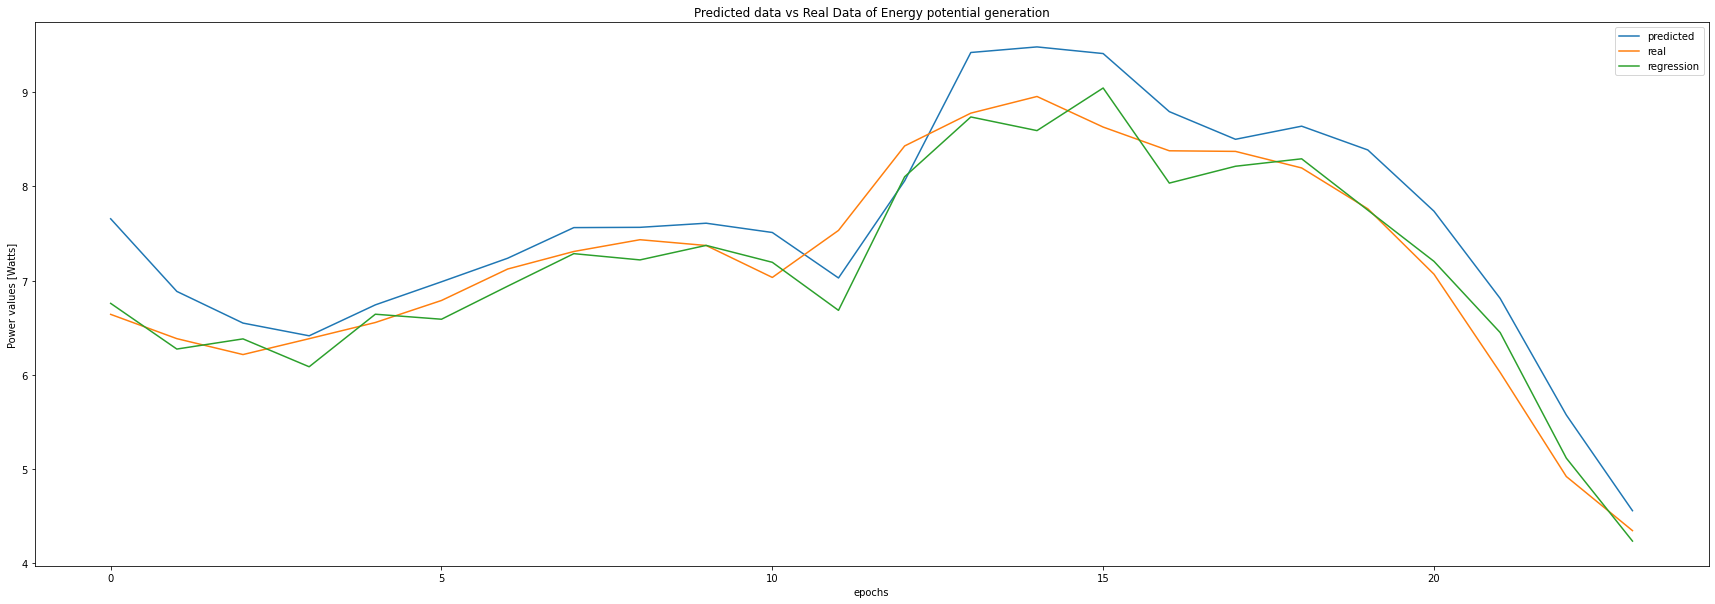

MSE ERROR NN
0.26037061874364004
MSE ERROR REGRESSION
0.1657832011361185


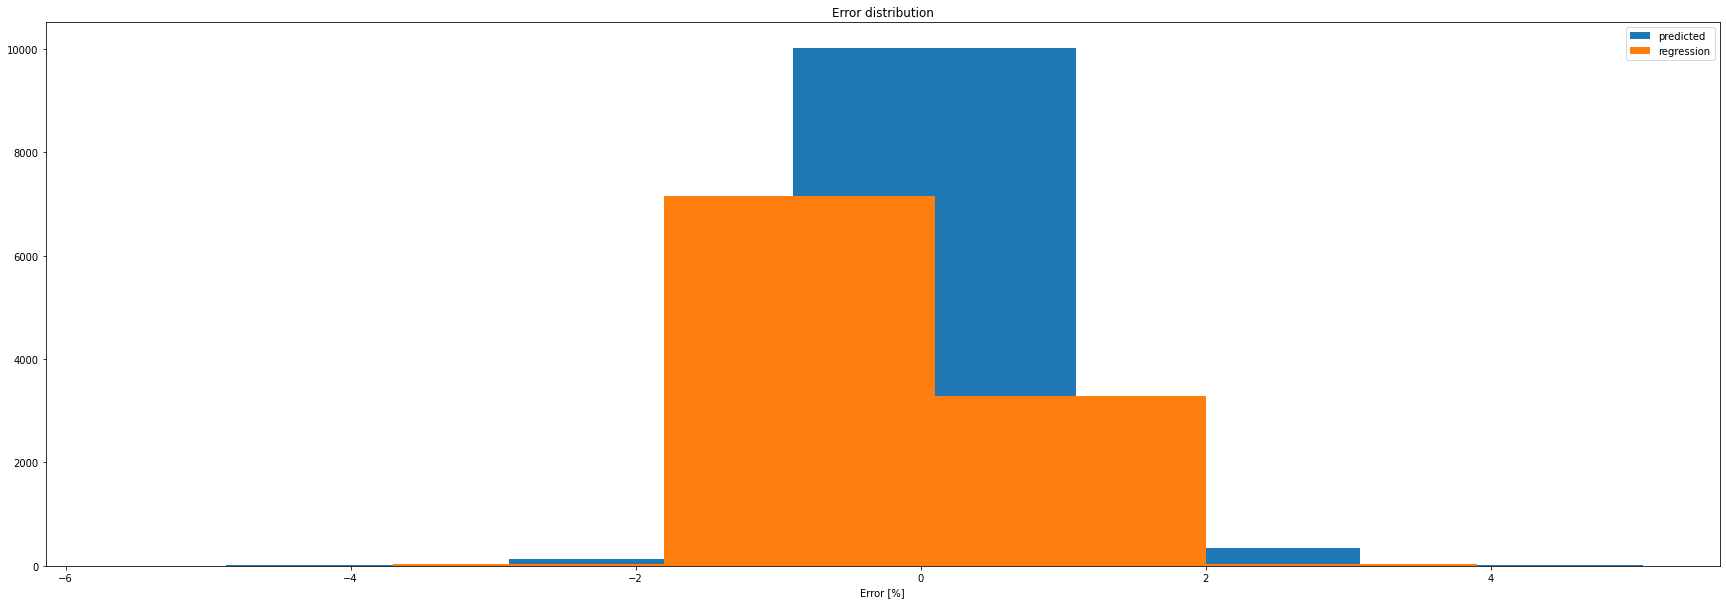

In [ ]:
#Making predictions
test_predictions = model.predict(dfeval_p).flatten()
plt.rcParams['figure.figsize'] = [30, 10]
plt.plot(test_predictions[:24])
plt.plot(y_eval_p[:24])
plt.plot(predictions_regresions[:24])
plt.xlabel("epochs")
plt.ylabel("Power values [Watts]")
plt.title("Predicted data vs Real Data of Energy potential generation")
plt.legend(["predicted","real","regression"])
plt.show()

error = test_predictions - y_eval_p
error_re = predictions_regresions - y_eval_p
plt.hist(error, bins = 5)
plt.hist(error_re, bins = 5)
plt.legend(["predicted","regression"])
plt.title("Error distribution")
plt.xlabel("Error [%]")

print('MSE ERROR NN')
print(np.square(np.subtract(y_eval_p,test_predictions)).mean())
print('MSE ERROR REGRESSION')
print(np.square(np.subtract(y_eval_p,predictions_regresions)).mean())

In [ ]:
import tensorflow as tf
from google.colab import files

In [ ]:
!mkdir -p saved_model
model.save('saved_model\my_model_4')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

 new_evaluacion_1_hora_futuro.csv      saved_model/
'new_training_1_hora_futuro (1).csv'  'saved_model\my_model'/
 new_training_1_hora_futuro.csv       'saved_model\my_model_new'/
 sample_data/


In [ ]:
export_dir = '.\saved_model\my_model'
tf.saved_model.save(model, export_dir=export_dir)

In [ ]:
ls

 new_evaluacion_1_hora_futuro.csv      sample_data/
'new_training_1_hora_futuro (1).csv'   saved_model/
 new_training_1_hora_futuro.csv       'saved_model\my_model'/


In [ ]:
files.download('saved_model\my_model_')

In [ ]:
files.download(export_dir)